## roifile library 설치

In [6]:
!pip install roifile

## Roi 파일 Load
- 우리가 labeling한 뇌전이암 데이터 사용

In [4]:
from roifile import ImagejRoi

roi2 = ImagejRoi.fromfile('./img_061(1).roi')

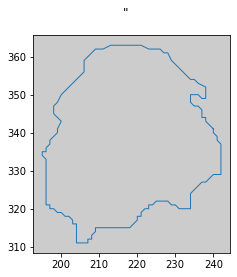

In [5]:
#plot 그려보기
roi2.plot()

In [6]:
import numpy as np

#포인트 좌표값 가져오기
A = roi2.coordinates(multi=True)
A = A[0]

#mask 이미지를 만들 0으로 이루어진 array만들기
np_zeros = np.zeros((405,310), dtype=np.uint8)

## 라인 그려보기

In [7]:
import cv2

for i in range(len(A)-1):
    pointA = (A[i][0], A[i][1])
    pointB = (A[i+1][0], A[i+1][1])
    LineImage = cv2.line(np_zeros, pointA, pointB, 123, 1)

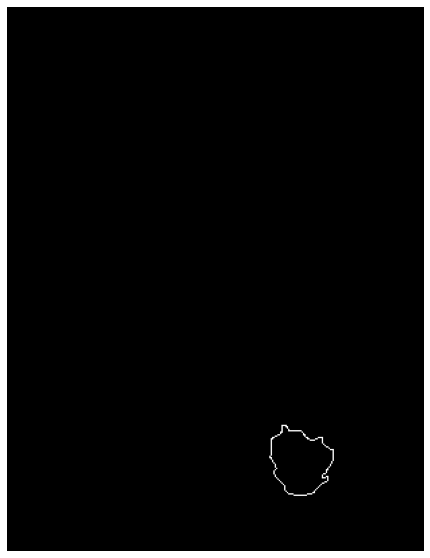

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.imshow(LineImage, cmap = 'gray')
plt.axis("off")
plt.show()

## Mask 이미지 만들기

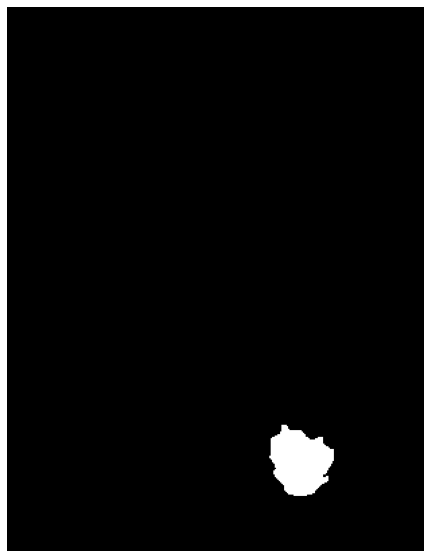

In [9]:
mask_img = cv2.fillPoly(np_zeros,[A],1)

plt.figure(figsize = (10,10))
plt.imshow(mask_img, cmap = 'gray')
plt.axis("off")
plt.show()

## 영역 맞추기

In [10]:
import pydicom as py

d = py.read_file("C:/Users/user/Desktop/Labeling_프로그램/뇌전의암/data/완료/20210903/GMC-0459/MR000062.dcm")
img = d.pixel_array
img.shape

(512, 448)

In [11]:
np_zeros = np.zeros((img.shape), dtype=np.uint8)
np_zeros.shape

(512, 448)

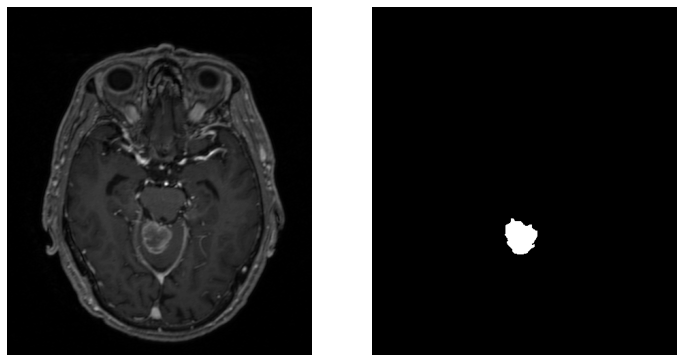

In [24]:
mask_img = cv2.fillPoly(np_zeros,[A],1)

plt.figure(figsize = (12,14))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mask_img, cmap = 'gray')
plt.axis("off")

plt.show()